## Streaming Service Dataset - Exploratory and Descriptive Analysis
In this notebook, we conduct an in-depth exploratory and descriptive analysis of a streaming service dataset, which includes information on user demographics, watch habits, content preferences, download behaviors, subscription levels, and interaction history.

The primary goal of this analysis is to uncover user engagement patterns, understand content consumption trends, and detect factors influencing loyalty and satisfaction. This foundational step is critical before any modeling or recommendation engine development, as it helps us identify data quality issues, understand feature distributions, and observe key relationships.

Throughout the analysis, we examine how metrics like watch hours, loyalty points, download activity, and ratings vary across different age groups, countries, genres, and platform types. Visual tools are used extensively to present insights clearly and interactively.

### import library

**pandas**: Used for data manipulation, cleaning, and analysis in tabular form.

**numpy**: Provides fast numerical computations and array operations.

**os**: Manages file and directory paths for saving and loading data or outputs.

**plotly.express**:Creates interactive and customizable visualizations.

In [3]:
# import Libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px

## Define and Create Directory Paths

To ensure reproducibility andorganized storage, we programmatically create directories for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.



In [5]:
# Get working directory
current_dir=os.getcwd()

# Go one directory up to root directory
project_root_dir=os.path.dirname(current_dir)

# Define paths to the data folders
data_dir=os.path.join(project_root_dir,'data')
raw_dir=os.path.join(data_dir,'raw')
processed_dir=os.path.join(data_dir,'processed')

# Define paths to results folders
result_dir=os.path.join(project_root_dir,'results')

# Define paths to Docs folder
docs_dir=os.path.join(project_root_dir,'docs')

# Create a directories if they do not exists

os.makedirs(raw_dir,exist_ok=True)
os.makedirs(processed_dir,exist_ok=True)
os.makedirs(result_dir,exist_ok=True)
os.makedirs(docs_dir,exist_ok=True)

## Loading a cleaned dataset 

this dataset is stored in **processed folder**

In [7]:
stream_data_filename=os.path.join(processed_dir,"cleaned_stream_data.csv")
stream_df=pd.read_csv(stream_data_filename)
stream_df.head()

,User_ID,User_Name,Join_Date,Last_Login,Monthly_Price,Watch_Hours,Favorite_Genre,Active_Devices,Profile_Count,Parental_Controls,...,Average_Rating_Given,Has_Downloaded_Content,Membership_Status,Loyalty_Points,First_Device_Used,Age_Group,Primary_Watch_Time,Watch_Hour_Group,Loyalty_Point_Group,Age_Category
0,2518,Amber,5/15/2023,12/13/2024,7.99,49,Action,3,6,True,...,3.3,False,Active,2878,Smartphone,35-44,Late Night,0-50,2000-2999,Mature Streamers
1,6430,Patrick,4/3/2023,12/15/2024,7.99,161,Drama,1,2,True,...,4.0,False,Active,2291,Desktop,25-34,Evening,101-200,2000-2999,Adult Streamers
2,1798,Robert,8/2/2023,12/14/2024,11.99,87,Action,2,5,False,...,3.1,False,Active,1692,Desktop,35-44,Late Night,51-100,1000-1999,Mature Streamers
3,5255,Cole,1/31/2023,12/2/2024,15.99,321,Sci-Fi,1,5,False,...,4.6,False,Active,952,Desktop,25-34,Evening,301-500,0-999,Adult Streamers
4,2854,Jamie,6/6/2023,12/15/2024,11.99,386,Documentary,1,4,True,...,3.7,False,Active,1823,Desktop,25-34,Late Night,301-500,1000-1999,Adult Streamers


## Understanding a Dataset

Number of rows and columns we have after making cleaning

In [9]:
stream_df.shape

(1000, 26)

## 📄 Dataset Columns and Data Types

| Column Name               | Data Type | Description                                                                                     |
|---------------------------|-----------|-------------------------------------------------------------------------------------------------|
| **User_ID**               | int64     | Unique identifier for each user.                                                               |
| **User_Name**             | object    | The name or username of the user.                                                              |
| **Join_Date**             | object    | The date when the user created their account (stored as string/object).                         |
| **Last_Login**            | object    | The most recent login date for the user (stored as string/object).                             |
| **Monthly_Price**         | float64   | Monthly subscription price paid by the user.                                                  |
| **Watch_Hours**           | int64     | Total hours the user has spent watching content.                                              |
| **Favorite_Genre**        | object    | The genre most frequently watched by the user (e.g., Action, Comedy, Drama).                   |
| **Active_Devices**        | int64     | Number of devices linked to the user account.                                                 |
| **Profile_Count**         | int64     | Number of user profiles under the account.                                                    |
| **Parental_Controls**     | bool      | Indicates if parental control settings are enabled (True or False).                            |
| **Total_Movies_Watched**  | int64     | Total movies watched by the user.                                                             |
| **Total_Series_Watched**  | int64     | Total series watched by the user.                                                             |
| **Country**               | object    | User's country of residence (e.g., USA, UK, India).                                           |
| **Payment_Method**        | object    | Payment method used by the user (e.g., Credit Card, PayPal).                                  |
| **Language_Preference**   | object    | Preferred content/interface language (e.g., English, Spanish).                                |
| **Recommended_Content_Count** | int64  | Number of recommended contents the user received.                                            |
| **Average_Rating_Given**  | float64   | Average rating given by the user to the content.                                              |
| **Has_Downloaded_Content**| bool      | Whether the user has downloaded any content (True or False).                                  |
| **Membership_Status**     | object    | Membership status indicating active or inactive.                                              |
| **Loyalty_Points**       | int64     | Total loyalty points accumulated by the user.                                                |
| **First_Device_Used**    | object    | The first device used to access the platform (e.g., Smartphone, Smart TV).                    |
| **Age_Group**            | object    | Age group category the user belongs to (e.g., Teen, Adult, Senior).                           |
| **Primary_Watch_Time**   | object    | Time of day the user most frequently watches content (e.g., Morning, Evening).                |
| **Watch_Hour_Group**     | object    | Group/category based on total watch hours (e.g., Low, Medium, High).                          |
| **Loyalty_Point_Group**  | object    | Group/category based on loyalty points accumulated.                                          |
| **Age_Category**         | object    | Categorized age data used for grouped analysis (e.g., 18–25, 26–35).                         |

---

**Data Types Summary:**

- **bool:** 2 columns  
- **float64:** 2 columns  
- **int64:** 8 columns  
- **object (string):** 14 columns  


In [11]:
stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    1000 non-null   int64  
 1   User_Name                  1000 non-null   object 
 2   Join_Date                  1000 non-null   object 
 3   Last_Login                 1000 non-null   object 
 4   Monthly_Price              1000 non-null   float64
 5   Watch_Hours                1000 non-null   int64  
 6   Favorite_Genre             1000 non-null   object 
 7   Active_Devices             1000 non-null   int64  
 8   Profile_Count              1000 non-null   int64  
 9   Parental_Controls          1000 non-null   bool   
 10  Total_Movies_Watched       1000 non-null   int64  
 11  Total_Series_Watched       1000 non-null   int64  
 12  Country                    1000 non-null   object 
 13  Payment_Method             1000 non-null   object

## Summary Statistics
### Numerical Varible

In [13]:
stream_df.describe()

,User_ID,Monthly_Price,Watch_Hours,Active_Devices,Profile_Count,Total_Movies_Watched,Total_Series_Watched,Recommended_Content_Count,Average_Rating_Given,Loyalty_Points
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,5610.52100,12.026000,254.516000,3.04600,3.460000,515.897000,99.746000,51.482000,4.01030,2444.217000
std,2566.98922,3.238702,140.667264,1.42966,1.749703,282.697585,58.452238,29.323498,0.58459,1434.619603
min,1003.00000,7.990000,10.000000,1.00000,1.000000,12.000000,1.000000,0.000000,3.00000,3.000000
25%,3587.75000,7.990000,136.000000,2.00000,2.000000,273.750000,48.750000,26.000000,3.50000,1251.500000
50%,5694.00000,11.990000,256.000000,3.00000,3.000000,510.000000,103.000000,52.500000,4.00000,2423.000000
75%,7794.25000,15.990000,373.250000,4.00000,5.000000,770.750000,150.000000,77.000000,4.50000,3660.000000
max,9996.00000,15.990000,500.000000,5.00000,6.000000,1000.000000,200.000000,100.000000,5.00000,4990.000000


### Explanation:

- **Count:** Total number of non-null entries (all columns have 1000 entries, so no missing data).
- **Mean:** Average value, indicating central tendency for each column.
- **Std (Standard Deviation):** Measures spread or variability around the mean.
- **Min and Max:** Minimum and maximum values showing the range.
- **25%, 50%, 75% (Quartiles):** Represent the distribution spread, where:
  - 25% is the first quartile (Q1),
  - 50% is the median,
  - 75% is the third quartile (Q3).

### Insights:

- The **Monthly_Price** ranges mostly between $7.99  and  $15.99, with an average price of $12.03.
- Users typically watch between 10 and 500 hours, with a mean of 254 hours.
- The number of **Active_Devices** per user ranges from 1 to 5, averaging around 3.
- The average rating given by users is high (~4.01 out of 5), indicating overall positive user feedback.
- Loyalty points vary widely, from as low as 3 to nearly 5000, showing differences in user engagement.

This summary helps understand user behavior and subscription patterns in the streaming service dataset.

### categorical Variable

In [16]:
stream_df.describe(include='object')

,User_Name,Join_Date,Last_Login,Favorite_Genre,Country,Payment_Method,Language_Preference,Membership_Status,First_Device_Used,Age_Group,Primary_Watch_Time,Watch_Hour_Group,Loyalty_Point_Group,Age_Category
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,340,540,30,7,7,4,6,1,5,5,4,5,5,5
top,Michael,4/17/2023,11/29/2024,Horror,USA,PayPal,Mandarin,Active,Tablet,45-54,Late Night,301-500,1000-1999,Older Streamers
freq,25,6,48,157,158,269,179,1000,215,208,271,408,215,208


### Explanation:

- **Count:** Number of non-null entries (all columns have full 1000 entries, no missing values).
- **Unique Values:** Number of distinct values in the column.
- **Top (Most Frequent) Value:** The most common value in the column.
- **Frequency:** Number of times the top value occurs.

### Insights:

- The most common user name is **Michael** (25 users).
- Users joined most frequently on **4/17/2023**.
- The most frequent last login date is **11/29/2024**.
- The favorite genre among users is **Horror**.
- The majority of users are from the **USA**.
- **PayPal** is the most used payment method.
- Most users prefer content in **Mandarin**.
- All users currently have **Active** membership status.
- The first device used to access the service is most commonly a **Tablet**.
- The most common age group is **45-54**, labeled under **Older Streamers**.
- Users mostly watch during **Late Night** hours.
- The largest watch hour group is between **301-500 hours**.
- Most users fall into the **1000-1999 loyalty points** group.

This summary provides insights into user demographics, preferences, and usage patterns.

## Understanding all Categorical 

In [19]:
stream_df['Favorite_Genre'].value_counts()

Favorite_Genre
Horror         157
Action         150
Comedy         146
Romance        146
Drama          142
Documentary    130
Sci-Fi         129
Name: count, dtype: int64

In [20]:
stream_df['Country'].value_counts()

Country
USA          158
France       151
UK           150
Germany      146
Australia    140
Canada       139
India        116
Name: count, dtype: int64

In [21]:
stream_df['Payment_Method'].value_counts()

Payment_Method
PayPal            269
Cryptocurrency    254
Debit Card        249
Credit Card       228
Name: count, dtype: int64

In [22]:
stream_df['Language_Preference'].value_counts()

Language_Preference
Mandarin    179
French      171
English     168
German      167
Hindi       162
Spanish     153
Name: count, dtype: int64

In [23]:
stream_df['First_Device_Used'].value_counts()

First_Device_Used
Tablet        215
Smartphone    209
Smart TV      209
Desktop       189
Laptop        178
Name: count, dtype: int64

In [24]:
stream_df['Age_Group'].value_counts()

Age_Group
45-54    208
35-44    207
55+      205
25-34    200
18-24    180
Name: count, dtype: int64

In [25]:
stream_df['Age_Category'].value_counts()

Age_Category
Older Streamers     208
Mature Streamers    207
Senior Streamers    205
Adult Streamers     200
Young Streamers     180
Name: count, dtype: int64

In [26]:
stream_df['Primary_Watch_Time'].value_counts()

Primary_Watch_Time
Late Night    271
Evening       256
Afternoon     251
Morning       222
Name: count, dtype: int64

In [27]:
stream_df['Watch_Hour_Group'].value_counts()

Watch_Hour_Group
301-500     408
101-200     210
201-300     201
0-50         93
51-100       88
Name: count, dtype: int64

In [28]:
stream_df['Loyalty_Point_Group'].value_counts()

Loyalty_Point_Group
1000-1999     215
0-999         207
2000-2999     196
3000-3999     191
4000-4990     191
Name: count, dtype: int64

### KPI Calculations

### Note: All users currently have an active membership.

## Watch Hours by Age Category

In [32]:
age_category_counts = stream_df["Age_Category"].value_counts().reset_index()
age_category_counts.columns = ["Age_Category", "User_Count"]
age_category_counts

,Age_Category,User_Count
0,Older Streamers,208
1,Mature Streamers,207
2,Senior Streamers,205
3,Adult Streamers,200
4,Young Streamers,180


In [33]:
age_category_counts = stream_df["Age_Category"].value_counts().reset_index()
age_category_counts.columns = ["Age_Category", "User_Count"]

fig = px.pie(
    age_category_counts,
    names="Age_Category",
    values="User_Count",
    title="Viewer Age Category Distribution",
    hole=0.4,
    color_discrete_sequence=px.colors.sequential.Blues_r
)

fig.update_layout(
    template="presentation",
    height=600,
    width=800,
    legend_title=dict(text="Age Categories"),
    paper_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()
fig.write_image(os.path.join(result_dir,'Viewer Age Category Distribution.jpg'))
fig.write_image(os.path.join(result_dir,'Viewer Age Category Distribution.png'))
fig.write_html(os.path.join(result_dir,'Viewer Age Category Distribution.html'))

The dataset categorizes users into five age groups with the following user counts:

- **Older Streamers:** 208 users  
- **Mature Streamers:** 207 users  
- **Senior Streamers:** 205 users  
- **Adult Streamers:** 200 users
- **Young Streamers:** 180 users  

A donut pie chart was created using Plotly Express to visualize this distribution, showing the proportion of users in each age category. We have to  saved as `.jpg`, `.png`, and `.html` files for reporting purposes in result folders.

### Favorite genre by Country

In [36]:
Favorite_genre_country = stream_df.groupby(['Country', 'Favorite_Genre']).size().reset_index(name='total').sort_values(by='total', ascending=False)
Favorite_genre_country

,Country,Favorite_Genre,total
18,France,Horror,36
45,USA,Drama,32
36,UK,Comedy,30
21,Germany,Action,28
4,Australia,Horror,27
42,USA,Action,26
19,France,Romance,26
16,France,Documentary,24
12,Canada,Romance,24
13,Canada,Sci-Fi,24


In [37]:
fig = px.bar(
    Favorite_genre_country,
    x='Country',
    y='total',
    color='Favorite_Genre',
    barmode='group',
    title='Genre Preference by Country',
    text='total',
    color_discrete_sequence=px.colors.sequential.Blues_r,
    height=650,
    width=1250
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='User Count',
    legend_title='Favorite Genre',
    template='presentation',
    margin=dict(l=100, r=50, t=100, b=180),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    #xaxis_tickangle=-30
)

fig.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside'
)

fig.show()
fig.write_image(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.html'))


### Summary Description

The data represents the distribution of users' favorite genres across different countries. It reveals key viewing preferences such as Horror being most popular in France and Australia, Drama favored in the USA and Germany, and Comedy preferred in the UK and Canada. This summary highlights regional differences in content preferences, which can help in customizing content offerings and marketing strategies for each country.

- **France** has a strong preference for **Horror** (36 users) and **Romance** (26 users).
- **USA** users favor **Drama** (32 users), **Action** (26 users), and **Horror** (23 users).
- **UK** shows popularity for **Comedy** (30 users) and **Drama** (23 users).
- **Germany** users mostly enjoy **Action** (28 users) and **Drama** (23 users).
- **Australia**, **Canada**, and **India** have diverse preferences across genres like **Action**, **Romance**, **Comedy**, **Documentary**, and **Sci-Fi**.

## Payment method distribution

In [40]:
# Step 1: Compute average monthly price and loyalty points by payment method
pay_trends = stream_df.groupby('Payment_Method')[['Monthly_Price', 'Loyalty_Points']].mean().round(2).reset_index()

# Step 2: Create percentage columns (as % of column total)
pay_trends['Monthly_Price_percentage'] = (pay_trends['Monthly_Price'] / pay_trends['Monthly_Price'].sum() * 100).round(2)
pay_trends['Loyalty_Points_percentage'] = (pay_trends['Loyalty_Points'] / pay_trends['Loyalty_Points'].sum() * 100).round(2)

pay_trends


,Payment_Method,Monthly_Price,Loyalty_Points,Monthly_Price_percentage,Loyalty_Points_percentage
0,Credit Card,11.95,2343.54,24.84,24.01
1,Cryptocurrency,12.26,2469.45,25.49,25.30
2,Debit Card,11.97,2425.82,24.89,24.85
3,PayPal,11.92,2522.76,24.78,25.84


In [41]:
paypal = ['PayPal']
others = pay_trends[pay_trends['Payment_Method'] != 'PayPal'].sort_values(
    'Monthly_Price_percentage', ascending=False)['Payment_Method'].tolist()
custom_order = paypal + others

# Set categorical order
pay_trends['Payment_Method'] = pd.Categorical(
    pay_trends['Payment_Method'], categories=custom_order, ordered=True)

# Melt DataFrame for grouped bar chart
melted = pay_trends.melt(
    id_vars='Payment_Method',
    value_vars=['Monthly_Price_percentage', 'Loyalty_Points_percentage'],
    var_name='Metric',
    value_name='Percentage'
)

# Create the bar chart
fig = px.bar(
    melted,
    x='Payment_Method',
    y='Percentage',
    color='Metric',
    barmode='group',
    title="Payment Method Trends",
    text='Percentage',
    color_discrete_sequence=px.colors.sequential.Blues_r,
    height=600,
    width=1300
)

# Add text and styling
fig.update_traces(
    texttemplate='%{text:.1f}%',
    textposition='inside',
    marker_line_width=0
)

# Update layout
fig.update_layout(
    xaxis_title="Payment Method",
    yaxis_title="Percentage (%)",
    template="presentation",
    showlegend=True,
    legend_title_text="Metric",
    margin=dict(l=100, r=60, t=100, b=160),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(
        tickfont=dict(size=14),
        tickangle=0
    ),
    yaxis=dict(
        tickfont=dict(size=12)
    ),
    legend=dict(
        font=dict(size=12)
    )
)

# Show the figure
fig.show()

# Save images and HTML
fig.write_image(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.html'))

### Payment Method Summary

This table provides an overview of user subscription and loyalty statistics by payment method:

- **Payment_Method:** Different modes of payment used by users, including Credit Card, Cryptocurrency, Debit Card, and PayPal.
- **Monthly_Price:** The average monthly subscription price paid by users for each payment method.
- **Loyalty_Points:** The average loyalty points accumulated by users in each payment group.
- **Monthly_Price_percentage:** The percentage share of each payment method in the overall monthly price distribution.
- **Loyalty_Points_percentage:** The percentage share of loyalty points earned by users of each payment method.

The data indicates that Cryptocurrency users pay slightly higher monthly prices and earn a comparable amount of loyalty points, while PayPal users have the highest average loyalty points despite a marginally lower subscription price.


### Device behavior analysis

In [44]:
device_watch = (
    stream_df.groupby('First_Device_Used')['Watch_Hours']
    .mean()
    .round(2)
    .reset_index(name='Average_Watch_Hours')
    .sort_values(by='Average_Watch_Hours', ascending=False)
)

device_watch


,First_Device_Used,Average_Watch_Hours
3,Smartphone,271.84
0,Desktop,261.76
2,Smart TV,257.72
4,Tablet,243.98
1,Laptop,235.45


In [45]:
fig = px.bar(
    device_watch,
    x='First_Device_Used',
    y='Average_Watch_Hours',
    title='Device Watching Hours',
    text='Average_Watch_Hours',
    color_discrete_sequence=['#1f77b4'],
    height=500
)

fig.update_layout(
    xaxis_title='Device Used',
    yaxis_title='Average Watch Hours',
    template='presentation',
    showlegend=False,
    margin=dict(l=60, r=40, t=80, b=80),
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='inside',
    textfont_color='white',
    marker_opacity=0.7
)

fig.update_xaxes(tickangle=0, automargin=True)

fig.show()

fig.write_image(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.html'))




This table shows the average watch hours based on the first device used by viewers:

- **First_Device_Used:** The device users first accessed the streaming service on, including Smartphone, Desktop, Smart TV, Tablet, and Laptop.
- **Average_Watch_Hours:** The average number of hours watched by users who started on each device.

Key insights:
- Users who first accessed via **Smartphone** have the highest average watch hours (271.84 hours).
- Desktop and Smart TV users follow closely with averages of 261.76 and 257.72 hours, respectively.
- Tablet and Laptop users have comparatively lower average watch hours, at 243.98 and 235.45 hours.


## Device usage disribution

In [48]:
device_counts = stream_df["First_Device_Used"].value_counts().reset_index()
device_counts.columns = ["Device", "Count"]

fig = px.bar(
    device_counts,
    x="Device",
    y="Count",
    title="Device Usage Distribution",
    text="Count",
    color_discrete_sequence=['#1f77b4'],
    height=600,
    width=1100
)

fig.update_traces(texttemplate="%{text}", textposition="outside")

fig.update_layout(
    template="presentation",
    xaxis_title="Device Used",
    yaxis_title="User Count",
    xaxis_title_standoff=50,
    legend_title_text=None,
    showlegend=False,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Device_Usage_Distribution_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Device_Usage_Distribution_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Device_Usage_Distribution_Bar_chart.html'))


Most of the users or viewers like to use **Tablets** followed by **Smartphone**

### Watching hours per day

In [51]:

time_watch = (
    stream_df.groupby('Primary_Watch_Time')['Watch_Hours']
    .mean()
    .round(2)
    .reset_index(name='Average_Watch_Hours')
    .sort_values(by='Average_Watch_Hours', ascending=False)
)
time_watch

,Primary_Watch_Time,Average_Watch_Hours
3,Morning,272.33
1,Evening,255.39
0,Afternoon,247.08
2,Late Night,245.98


In [52]:
time_watch = (
    stream_df.groupby('Primary_Watch_Time')['Watch_Hours']
    .mean()
    .round(2)
    .reset_index(name='Average_Watch_Hours')
    .sort_values(by='Average_Watch_Hours', ascending=False)
)


fig = px.bar(
    time_watch,
    x='Primary_Watch_Time',
    y='Average_Watch_Hours',
    title='Watch Hours per Day',
    text='Average_Watch_Hours',
    color_discrete_sequence=['#1f77b4'],
    height=600,
    width=1100
)

fig.update_traces(
    texttemplate='%{text}',
    textposition='outside'
)

fig.update_layout(
    template="presentation",
    xaxis_title="Time of Day",
    yaxis_title="Average Watch Hours",
    xaxis_title_standoff=50,
    legend_title_text=None,
    showlegend=False,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)


fig.show()


fig.write_image(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.html'))



This table presents the average watch hours based on the primary time of day users watch content:

- **Primary_Watch_Time:** The main time period when users watch content (Morning, Afternoon, Evening, Late Night).
- **Average_Watch_Hours:** The average number of hours watched by users during each time period.

Key insights:
- Users watching primarily in the **Morning** have the highest average watch hours (272.33 hours).
- Watching during the **Evening** follows with an average of 255.39 hours.
- The **Afternoon** and **Late Night** watch periods have slightly lower averages of 247.08 and 245.98 hours, respectively.


## Preffered watching time

In [55]:
watch_time = stream_df["Primary_Watch_Time"].value_counts().reset_index()
watch_time.columns = ["Primary_Watch_Time", "User_Count"]

fig = px.bar(
    watch_time,
    x="Primary_Watch_Time",
    y="User_Count",
    title="Preferred Watching Time",
    text="User_Count",
    color_discrete_sequence=['#1f77b4'],  # Changed to blue
    height=600,
    width=1100
)

fig.update_traces(texttemplate="%{text}", textposition="outside")

fig.update_layout(
    template="presentation",
    xaxis_title="Watching Time",
    yaxis_title="Number of Users",
    xaxis_title_standoff=50,
    legend_title_text=None,
    showlegend=False,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()


fig.write_image(os.path.join(result_dir, 'Preferred_Watching_Time_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Preferred_Watching_Time_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Preferred_Watching_Time_Bar_chart.html'))


This table presents the data based on the primary time of day users watch content:

- **Primary_Watch_Time:** The main time period when users watch content (Morning, Afternoon, Evening, Late Night).
Key insights:
- Many Users watch primarily in the **late night** with 271 viewers
- Watching during the **Evening** follows with 256
- The **Afternoon** and **morning** watch periods have slightly low number of viewers respectively.

## Genre ratings

In [58]:
genre_ratings = stream_df.groupby('Favorite_Genre')['Average_Rating_Given'].sum().round(2).reset_index(name='total rating').sort_values(by='total rating',ascending=False).reset_index()
genre_ratings

,index,Favorite_Genre,total rating
0,4,Horror,624.5
1,0,Action,599.9
2,1,Comedy,586.5
3,5,Romance,584.5
4,3,Drama,572.0
5,2,Documentary,522.4
6,6,Sci-Fi,520.5


In [59]:
rating_counts = stream_df.groupby("Favorite_Genre")["Average_Rating_Given"].count().reset_index()
rating_counts.columns = ["Genre", "Rating_Count"]

avg_rating_genre = stream_df.groupby("Favorite_Genre")["Average_Rating_Given"].mean().reset_index()
avg_rating_genre.columns = ["Genre", "Average_Rating"]

combined = avg_rating_genre.merge(rating_counts, on="Genre")

fig = px.scatter(
    combined,
    x="Average_Rating",
    y="Genre",
    size="Rating_Count",
    color="Average_Rating",
    color_continuous_scale="Blues", 
    title="Average Rating by Genre with Rating Volume",
    height=600,
    width=1000,
    opacity=0.7  
)

fig.update_layout(
    xaxis_title="Average Rating",
    yaxis_title="Genre",
    template="presentation",
    margin=dict(l=150, r=50, t=100, b=50),  
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.update_yaxes(tickangle=0, automargin=True)

fig.show()


fig.write_image(os.path.join(result_dir, 'Average_Rating_by_Genre_Bubble_Chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Average_Rating_by_Genre_Bubble_Chart.png'))
fig.write_html(os.path.join(result_dir, 'Average_Rating_by_Genre_Bubble_Chart.html'))


**Summary:**  
- **Sci-Fi** leads with the highest rating of 4.03, indicating strong viewer engagement.  
- **Romance**, **Horror**, and **Drama** also have high ratings, showing their popularity.  
- **Documentary**, **Comedy**, and **Action** follow with relatively lower ratings.

## Favorite genres

In [62]:
fav_genre = stream_df["Favorite_Genre"].value_counts().reset_index()
fav_genre.columns = ["Genre", "Count"]
fav_genre = fav_genre.sort_values(by="Count", ascending=True)  

fig = px.bar(
    fav_genre,
    y="Genre",
    x="Count",
    orientation="h",
    title="Favorite Genre Distribution",
    text="Count",
    color_discrete_sequence=['#1f77b4'], 
    height=600,
    width=1100
)

fig.update_traces(texttemplate="%{text}", textposition="outside")

fig.update_layout(
    template="presentation",
    xaxis_title="Number of Users",
    yaxis_title="Genre",
    xaxis_title_standoff=50,
    legend_title_text=None,
    showlegend=False,
    margin=dict(l=200, r=50, t=100, b=50),
    yaxis=dict(tickmode='linear'),
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart_horizontal.jpg'))
fig.write_image(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart_horizontal.png'))
fig.write_html(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart_horizontal.html'))



**Summary:**  
- **Horror** leads with about 157 counts, indicating strong viewer engagement.  
- **Action**, **Comedy**, and **Romance** also have high number of viewers, showing their popularity.  
- **Drama**, **Documentary**, and **Sci-Fi** follow with relatively low number of viewers.


### Language preference by country

In [65]:
lang_country = stream_df.groupby(['Country', 'Language_Preference']).size().reset_index(name='Count')

lang_country


,Country,Language_Preference,Count
0,Australia,English,28
1,Australia,French,27
2,Australia,German,18
3,Australia,Hindi,15
4,Australia,Mandarin,30
5,Australia,Spanish,22
6,Canada,English,22
7,Canada,French,24
8,Canada,German,25
9,Canada,Hindi,26


In [66]:
fig = px.treemap(
    lang_country,
    path=['Country', 'Language_Preference'],
    values='Count',
    title='Language Preference by Country',
    color='Count',
    color_continuous_scale='Viridis',
    height=700,
)


fig.update_layout(
    margin=dict(l=50, r=50, t=100, b=50),
    coloraxis_colorbar=dict(
        title='Count',
        thickness=15,
        len=0.5,
        yanchor='middle',
        y=0.5
    ),
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()


fig.write_image(os.path.join(result_dir, 'Language_Preference_by_Country.jpg'))
fig.write_image(os.path.join(result_dir, 'Language_Preference_by_Country.png'))
fig.write_html(os.path.join(result_dir, 'Language_Preference_by_Country.html'))


- **English** and **Mandarin** are among the most popular language preferences across most countries.
- The **USA** and **Australia** have the highest counts for Mandarin speakers (30 users each).
- Language preference distributions are quite diverse within countries, with multiple languages represented.
- French, German, Hindi, and Spanish also show significant representation across all countries.

## Monthly Revenue Comparison (2022 vs 2023 vs 2024)
This chart displays the total monthly revenue ($) generated over the years 2022, 2023, and 2024, helping to visualize revenue trends, seasonal patterns, and year-over-year performance.

In [69]:
# Convert Join_Date to datetime
stream_df['Join_Date'] = pd.to_datetime(stream_df['Join_Date'])

# Create Year-Month column for grouping
stream_df['YearMonth'] = stream_df['Join_Date'].dt.to_period('M').astype(str)


In [70]:
monthly_revenue = (
    stream_df.groupby('YearMonth')['Monthly_Price']
    .sum()
    .reset_index()
    .rename(columns={'Monthly_Price': 'Total_Revenue'})
)


In [71]:
# Ensure datetime format
stream_df['Join_Date'] = pd.to_datetime(stream_df['Join_Date'])

# Extract Year and Month
stream_df['Year'] = stream_df['Join_Date'].dt.year
stream_df['Month'] = stream_df['Join_Date'].dt.strftime('%b')  # e.g. 'Jan', 'Feb'

# Order the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group by Year and Month, and sum revenue
monthly_revenue = stream_df.groupby(['Year', 'Month'])['Monthly_Price'].sum().reset_index()
monthly_revenue.rename(columns={'Monthly_Price': 'Total_Revenue'}, inplace=True)

# Make sure months are in correct order
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values(['Year', 'Month'])


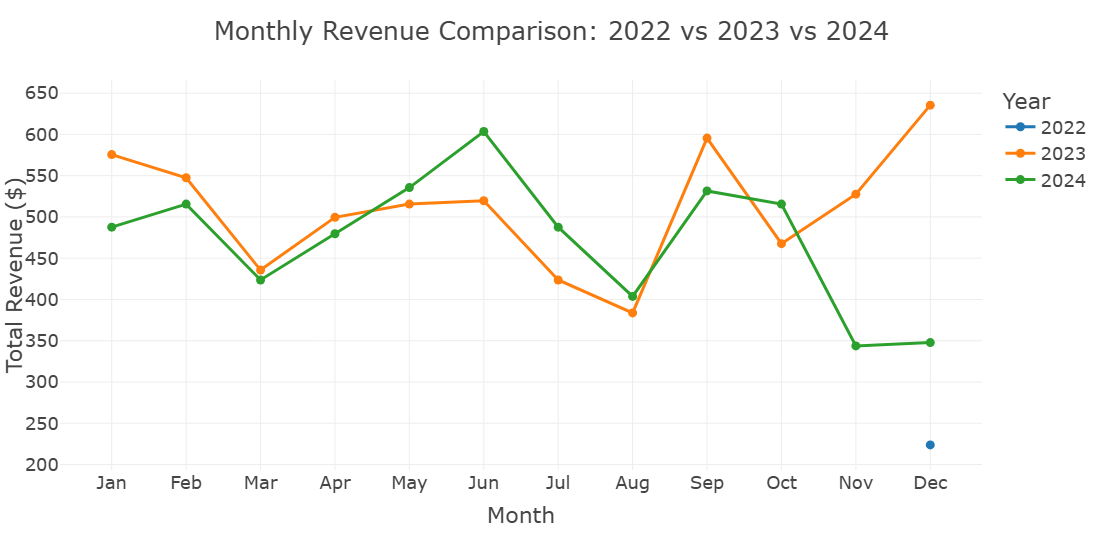

In [72]:
fig = px.line(
    monthly_revenue,
    x='Month',
    y='Total_Revenue',
    color='Year',
    markers=True,
    title='Monthly Revenue Comparison: 2022 vs 2023 vs 2024',
    category_orders={'Month': month_order},  
    template='presentation',
    line_shape='linear'
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Revenue ($)',
    legend_title_text='Year',
    height=550,
    width=1000,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=60, r=40, t=80, b=80)
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Monthly_Revenue_Comparison_Line_Chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Monthly_Revenue_Comparison_Line_Chart.png'))
fig.write_html(os.path.join(result_dir, 'Monthly_Revenue_Comparison_Line_Chart.html'))
